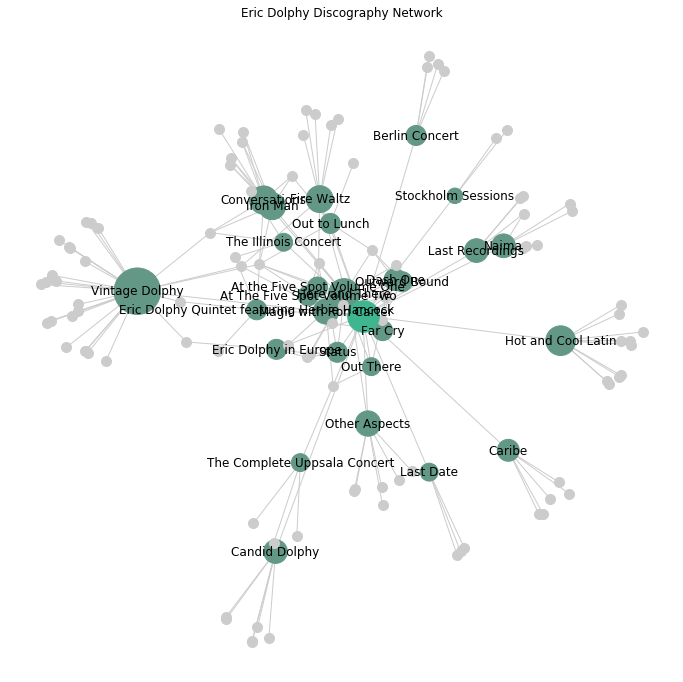

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
# for use with kamada layout
# import numpy as np
# from scipy.optimize import minimize

# read data 
df = pd.read_csv("ericDolphyDiscog.csv")
albums = list(df.Album.unique())
artists = list(df.Artist.unique())

# fig dimensions 
plt.figure(figsize=(12, 12))

# create the graph
g = nx.from_pandas_edgelist(df, source='Artist', target='Album') 

# compare layouts

# spring layout
    # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
layout = nx.spring_layout(g,k=0.009,iterations=70)

# sprial layout
#layout = nx.spiral_layout(g)

# random layout
# top = nx.bipartite.sets(g)[1]
# layout = nx.bipartite_layout(g, top)

# circular layout
# layout = nx.circular_layout(g)

# kamada 
# layout = nx.kamada_kawai_layout(g)

# planar
# g = nx.path_graph(4)
# layout = nx.planar_layout(g)

# shell
# layout = nx.shell_layout(g)

# spectral
# layout = nx.spectral_layout(g)


# draw the parts we want
# Edges thin and grey
# Artists  ssmall and grey
# albums sized according to their number of connections
# Clubs blue
# Labels for albums ONLY
# artist who are highly connected are a highlighted color

# Go through every lp name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
lp_size = [g.degree(lp) * 80 for lp in albums]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=albums, 
                       node_size=lp_size, # a LIST of sizes, based on g.degree
                       node_color='#639887')

# draw all artists
nx.draw_networkx_nodes(g, layout, nodelist=artists, node_color='#cccccc', node_size=100)

# set dolphy's node size and color and draw
popular_people = [person for person in artists if g.degree(person) > 10]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='#3FB690', node_size=1000)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(albums, albums))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# turn off axis which palces a frame around network
plt.axis('off')
# title
plt.title("Eric Dolphy Discography Network")
# plot
plt.show()